In [1]:
import mne
import os.path as op
import numpy as np
from numpy.random import randn

In [2]:
from mne import io, read_epochs, Epochs, read_evokeds, combine_evoked 
from mne.epochs import equalize_epoch_counts

In [3]:
print ('The mne version is:', mne.__version__)

The mne version is: 0.19.2


In [4]:
# Load all modules..
import pickle
import numpy as np
import scipy
from scipy.io import loadmat
from scipy import stats
from copy import deepcopy
import seaborn as sns
import os.path
import matplotlib
import matplotlib.pylab as pylab
import pandas as pd
import sys

In [5]:
from scipy import stats as stats
from scipy.io import loadmat
from copy import deepcopy
from mne.stats import ttest_1samp_no_p
from mne.stats import (spatio_temporal_cluster_1samp_test,
                       permutation_cluster_1samp_test,
                       summarize_clusters_stc)

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable, ImageGrid
from matplotlib.ticker import NullFormatter

In [7]:
from matplotlib.pylab import *
import pylab as pl

In [8]:
import matplotlib.pyplot as plt
#font = {'family': 'serif', 'serif': ['Palatino']}
font = {'family': 'serif', 'serif': ['Helvetica']}
plt.rc('font', **font)
plt.rc('text', usetex=False)

In [9]:
label_fontsize = 16
title_fontsize = 16

In [10]:
#Set up parameters for figure display
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'axes.labelweight': 'bold',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)
pylab.rcParams["font.family"] = "serif"
pylab.rcParams["font.weight"] = "heavy"
#pylab.rcParams.update({'figure.autolayout': True})

In [11]:
sns.set(font_scale=1.25, style="whitegrid")

In [12]:
#for visualization..
import os
os.environ['ETS_TOOLKIT'] = 'qt4'
os.environ['QT_API'] = 'pyqt5'
from pyface.qt import QtGui, QtCore

In [13]:
from mayavi import mlab
%gui qt

In [14]:
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [15]:
def movingaverage(y, window_length):
    y_smooth = scipy.convolve(y,np.ones(window_length,dtype='float'), 'same')/scipy.convolve(np.ones(len(y)),
                                                                              np.ones(window_length), 'same')
    return y_smooth

In [16]:
def create_spaces():
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_drift = [left, bottom, width+0.6, height]
    rect_histupper = [left, bottom+0.65, width+0.6, 0.3]
    rect_histlower = [left, bottom-0.3, width+0.6, 0.3]
    return rect_drift,rect_histupper,rect_histlower

In [17]:
def format_axes(axDrift, axHistupper, axHistlower):
    axHistupper.xaxis.set_major_formatter(nullfmt)
    axHistupper.yaxis.set_major_formatter(nullfmt)
    axHistlower.yaxis.set_major_formatter(nullfmt)
    axHistlower.xaxis.set_major_formatter(nullfmt)

    axDrift.xaxis.set_major_formatter(nullfmt)
    axDrift.yaxis.set_major_formatter(nullfmt)

    axDrift.xaxis.grid(False)
    axDrift.yaxis.grid(False)
    axDrift.set_ylabel('Bias')
    axDrift.tick_params( axis='x',which='both',bottom='off', top='off', labelbottom='off')
    
    for item in ([axDrift.title, axDrift.xaxis.label, axDrift.yaxis.label] +
             axDrift.get_xticklabels() + axDrift.get_yticklabels()):
        item.set_fontsize(20)

    axHistupper.set_xticks([]) 
    axHistupper.set_yticks([]) 
    axHistlower.set_xticks([]) 
    axHistlower.set_yticks([]) 

In [18]:
def format_driftaxes(axDrift, x_upper, x_lower):
    axDrift.set_ylim([min(x_upper),-min(x_upper)])
    axDrift.set_xlim([-100,500])

    axDrift.plot((0, 0), (-1.2, 1.2), 'k--')

    axDrift.set_yticks([min(x_upper), 0, -min(x_upper)])
    y_ticks=axDrift.get_yticks().tolist()
    y_ticks[0] = '0'
    y_ticks[1] ='z*a'
    y_ticks[2] = 'a'
    axDrift.tick_params(axis=u'both', which=u'both',length=0)
    axDrift.set_yticklabels(y_ticks)

In [19]:
from scipy.stats import skewnorm

def create_histdata(stringval):
    if stringval == 'basic':
        a = 5
        r = skewnorm.rvs(a, size=10000)
    elif stringval == 'bias_shifted':
        a = 5
        loc = -0.5
        scale = 0.5
        r = skewnorm(a,loc,scale).rvs(10000)
    return r,a

In [20]:
basefolderpath = "/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/"
beh_files = 'decAlertnessDecisionmaking_JNeuroscience2021/beh_data/csv_files/'
output_dir = 'decAlertnessDecisionmaking_JNeuroscience2021/Figures/'

In [21]:
fig_dir = basefolderpath + output_dir
fig_dir

'/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/decAlertnessDecisionmaking_JNeuroscience2021/Figures/'

In [22]:
outputfolder = basefolderpath + "decAlertnessDecisionmaking_JNeuroscience2021/Results/results_hddmRegression/"

In [23]:
subjects = ['02','04','05','06','07','09','10','20','21','22',\
            '23','24','25','26','27','28','30','31','33',\
            '35','36','37','38','39','41','42','43','44',\
            '45','46'] #'32','34', these subjects are not used in classifier analysis,hence ignored here aswell..

# regression with drift-rate 'v'

In [24]:
nullfmt = NullFormatter() 
np.random.seed(1234)
Nsteps = 250
t = np.arange(Nsteps)
mu = 0.002
sigma = 0.01

# the steps and position
S = mu + sigma*np.random.randn(Nsteps)
X = S.cumsum()

# the 1 sigma upper and lower analytic population bounds
lower_bound = mu*t - sigma*np.sqrt(t)
upper_bound = mu*t + sigma*np.sqrt(t)
lower_bound = lower_bound*0.1
upper_bound = upper_bound*0.1
negX = -X

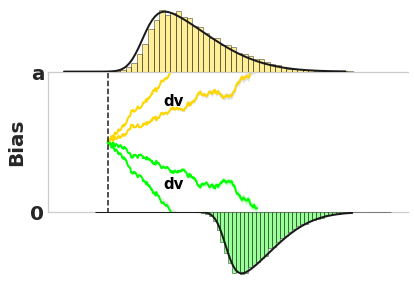

In [25]:
fig = plt.figure(1, figsize=(4, 3))

(rect_drift,rect_histupper,rect_histlower) = create_spaces()

axDrift = plt.axes(rect_drift)
axHistupper = plt.axes(rect_histupper)
axHistlower = plt.axes(rect_histlower)


shift_val = 0.15
slope1_val = 50
slope2_val = 600
axDrift.plot(t, X+t/slope1_val*shift_val, lw=2, color='gold')
axDrift.plot(t, negX+t/slope2_val*shift_val, lw=2,color='lime')
axDrift.plot(t, X, lw=2, color='gold')
axDrift.plot(t, negX-t/slope1_val*shift_val, lw=2,color='lime')

x_lower = X+t/slope1_val*shift_val - lower_bound 
x_upper = X+t/slope1_val*shift_val + lower_bound 

axDrift.fill_between(t, x_lower, x_upper, facecolor='gold', alpha=0.25)
axDrift.fill_between(t, x_lower-t/slope1_val*shift_val, x_upper-t/slope1_val*shift_val, 
                     facecolor='grey', alpha=0.25)

x_lower =  negX+t/slope2_val*shift_val- lower_bound 
x_upper =  negX+t/slope2_val*shift_val+ lower_bound 

axDrift.fill_between(t, x_lower, x_upper, facecolor='lime', alpha=0.25)
axDrift.fill_between(t, x_lower-t/slope1_val*shift_val, x_upper-t/slope1_val*shift_val, 
                     facecolor='grey', alpha=0.25)

#format axes..
format_axes(axDrift = axDrift, axHistupper = axHistupper, axHistlower = axHistlower) 

format_driftaxes(axDrift = axDrift, x_upper = x_upper-t/slope2_val*shift_val, 
                 x_lower = x_lower-t/slope2_val*shift_val)


a = 5
loc = 0.5
scale = 0.75
x_plt = np.linspace(skewnorm.ppf(0.01, a),skewnorm.ppf(0.95, a), 100)
rv = skewnorm(a,loc,scale)

axHistupper.plot(x_plt,rv.pdf(x_plt), 'grey', linewidth=0)

(r,a) =  create_histdata('bias_shifted')
x = r
a = 5
loc = 0.25
scale = 0.5
x_plt = np.linspace(skewnorm.ppf(0.001, a),skewnorm.ppf(0.95, a), 100)
rv = skewnorm(a,loc,scale)

# For upper histogram..
n, bins, patches = axHistupper.hist(x+0.5, 50, density=1, histtype='bar',ec='black')
pylab.setp(patches, 'facecolor', 'gold', 'alpha', 0.4)
# add a line showing the expected distribution
axHistupper.plot(x_plt-shift_val*1.9,rv.pdf(x_plt), 'k', linewidth=2)

(r,a) =  create_histdata('bias_shifted')
x = r
a = 5
loc = 1.1
scale = 0.5
x_plt = np.linspace(skewnorm.ppf(0.001, a),skewnorm.ppf(0.99, a), 100)
rv = skewnorm(a,loc,scale)

# For lower histogram..
n, bins, patches = axHistlower.hist(x+1.95, 50, density=1, histtype='bar',ec='black')
pylab.setp(patches, 'facecolor', 'lime', 'alpha', 0.4)
axHistlower.plot(x_plt+shift_val*2.5,rv.pdf(x_plt), 'k', linewidth=2)

a = 5
loc = 0.25
scale = 0.75
x_plt = np.linspace(skewnorm.ppf(0.001, a),skewnorm.ppf(0.95, a), 100)
rv = skewnorm(a,loc,scale)

axHistlower.plot(x_plt,rv.pdf(x_plt), 'grey', linewidth=0)
axHistlower.invert_yaxis()

y_ticks=axDrift.get_yticks().tolist()
y_ticks[0] = '0'
y_ticks[1] = ''
y_ticks[2] = 'a'
axDrift.set_yticklabels(y_ticks)

axHistupper.set_frame_on(False)
axHistlower.set_frame_on(False)
#axDrift.set_frame_on(False)
#axDrift.grid(True)
axDrift.spines['top'].set_visible(True)
axDrift.spines['right'].set_visible(False)
axDrift.spines['bottom'].set_visible(True)
axDrift.spines['left'].set_visible(True)

axDrift.text(110, 0.28, "dv", rotation=0, ha='center',va='bottom', color='black')
axDrift.text(110, -0.42, "dv", rotation=0, ha='center',va='bottom', color='black')

plt.savefig(fig_dir + "driftdiffusion_regression_v.png", bbox_inches = 'tight', pad_inches = 0.1)

In [26]:
#for display of schematic for hddm regression..
tips = sns.load_dataset('tips')
tips['slope'] = tips['tip']/tips['total_bill']
tips_below = tips[tips['slope'] <= 0.15]
tips_above = tips[tips['slope'] >= 0.15]

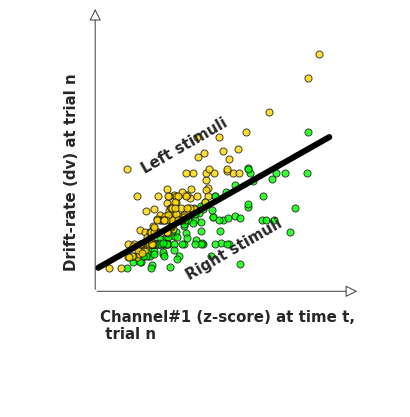

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
sns.regplot(x= 'total_bill', y='tip', data=tips,marker='o', color='red', 
                 line_kws = {'color':'black','lw': 6},ci = None, ax = ax,
                 scatter_kws={'s':50, 'edgecolor':'k','alpha':0.0})
sns.regplot(x= 'total_bill', y='tip', data=tips_below,marker='o', color='lime', ax = ax,
                 line_kws = {'color':'black','lw': 0},ci = None, 
                 scatter_kws={'s':50, 'edgecolor':'k','alpha':0.8})
sns.regplot(x= 'total_bill', y='tip', data=tips_above,marker='o', color='gold', ax = ax,
                 line_kws = {'color':'black','lw': 0},ci = None, 
                 scatter_kws={'s':50, 'edgecolor':'k','alpha':0.8})

plt.axis('off')
ax.set_xlim(-20,70)
ax.set_ylim(-5,11)
ann = ax.annotate("",xy=(0, 0), xycoords='data',xytext=(60, 0), textcoords='data',
                           size=25, va="center", ha="center",
                           arrowprops=dict(arrowstyle="<|-",color="0.25",fc="w"))
ann = ax.annotate("",xy=(0, 0), xycoords='data',xytext=(0, 12), textcoords='data',
                           size=25, va="center", ha="center",
                           arrowprops=dict(arrowstyle="<|-",color="0.25",fc="w"))


ax.annotate('Left stimuli', xy=(10, 5), xytext=(10, 5),rotation=30,)
ax.annotate('Right stimuli', xy=(20, 0.5), xytext=(20, 0.5),rotation=30,)


ax.annotate('Channel#1 (z-score) at time t, \n trial n', xy=(1, -2), xytext=(1, -2),)
ax.annotate('Drift-rate (dv) at trial n', xy=(-7,1), xytext=(-7, 1), rotation=90)
fig.tight_layout()
plt.savefig(fig_dir + "driftdiffusion_regression_v2.png", bbox_inches = 'tight', pad_inches = 0.1)

# Alert condition

In [28]:
epochs_fnames = list()
awake_fnames = list()
for s, subject in enumerate(subjects):  # Loop across each subject
    fnamepath = outputfolder + 'patterns/' + subject + '_' + 'awake_patterns_driftrateregression_ave.fif'
    if os.path.isfile(fnamepath):
        epochs_fnames.append(fnamepath)
        awake_fnames.append(subject)
    else:
        print("Skipping file")
    
evokeds_alert = [read_evokeds(f, verbose='error')[0] for f in epochs_fnames]
mean_evoked_alert = combine_evoked(evokeds_alert, weights="nave") #as each dataset is just 1 subject

In [29]:
mean_evoked_alert.times

array([-0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,
        0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,
        0.75,  0.8 ])

In [30]:
len(evokeds_alert)

30

In [31]:
np.max(evokeds_alert[0].data)

99.99999974752427

In [32]:
np.max(mean_evoked_alert.data)

99.91666641440133

In [33]:
#The actual times are as follows
#array([-0.175, -0.125, -0.075, -0.025,  0.025,  0.075,  0.125,  0.175,
#        0.225,  0.275,  0.325,  0.375,  0.425,  0.475,  0.525,  0.575,
#        0.625,  0.675,  0.725,  0.775])

In [34]:
time_indexes = array([-0.175, -0.125, -0.075, -0.025,  0.025,  0.075,  0.125,  0.175,
                       0.225,  0.275,  0.325,  0.375,  0.425,  0.475,  0.525,  0.575,
                       0.625,  0.675,  0.725,  0.775])

In [35]:
mean_evoked_alert.data = mean_evoked_alert.data/(10**6) #as the display is usually in uV
mean_evoked_alert.times = time_indexes

## Make colorbar manually as mne colorbar is not adjustable

In [36]:
topo_cmap = 'Spectral_r'

In [37]:
fig_dir

'/rds/project/tb419/rds-tb419-bekinschtein/Sri/SpatialAttention_Drowsiness/decAlertnessDecisionmaking_JNeuroscience2021/Figures/'

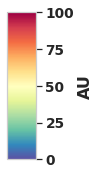

In [38]:
a = np.array([[0,25,50,75,100]])
pl.figure(figsize=[0.5, 3.4])

img = pl.imshow(a, cmap=topo_cmap)
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
cbar = pl.colorbar(orientation="vertical",cax=cax)
cbar.set_ticks([0,25,50,75,100])
cbar.set_ticklabels([0,25,50,75,100])
cbar.set_label(label='AU',weight='heavy', size = 16)
plt.savefig(fig_dir + "topoplot_regression_colorbar.png", dpi=240, bbox_inches = 'tight',
            transparent=False, pad_inches = 0.1)

In [39]:
topo_kwargs = dict(cmap = topo_cmap,time_unit='ms', show=False, show_names = False, 
                   contours=9, sensors=False)

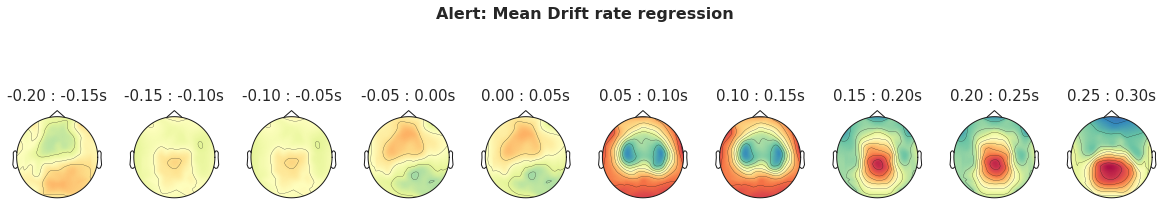

In [40]:
times = [-0.175, -0.125, -0.075, -0.025, 0.025, 
         0.075, 0.125, 0.175, 0.225, 0.275]
#stat annotation
time_format = ['-0.20 : -0.15s', '-0.15 : -0.10s', '-0.10 : -0.05s', '-0.05 : 0.00s','0.00 : 0.05s',\
               '0.05 : 0.10s', '0.10 : 0.15s', '0.15 : 0.20s', '0.20 : 0.25s', '0.25 : 0.30s']

figw, figh = 20, 4
fig, ax = plt.subplots(nrows=1, ncols=len(times), figsize=[figw, 4])

cmin =0
cmax = 100

for idx in range(len(times)):
        mean_evoked_alert.plot_topomap(axes = ax[idx],times=times[idx], time_format = time_format[idx],
                                   vmin = cmin, vmax = cmax,colorbar=False,**topo_kwargs)

fig.suptitle('Alert: Mean Drift rate regression',fontsize = 16, fontweight = 'heavy')
plt.show()

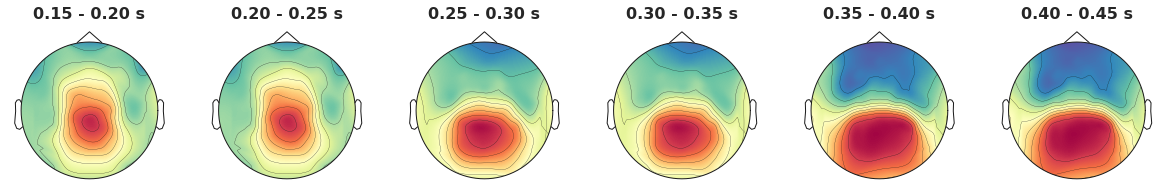

In [41]:
times = [0.175, 0.225, 0.275, 0.325, 0.375, 
         0.425]
#stat annotation
time_format = ['0.15 - 0.20 s', '0.20 - 0.25 s', '0.25 - 0.30 s', '0.30 - 0.35 s','0.35 - 0.40 s',\
               '0.40 - 0.45 s']

figw, figh = 20, 4
fig, ax = plt.subplots(nrows=1, ncols=len(times), figsize=[figw, 4])

cmin =0
cmax = 100

for idx in range(len(times)):
        mean_evoked_alert.plot_topomap(axes = ax[idx],times=times[idx], time_format = time_format[idx],
                                   vmin = cmin, vmax = cmax,colorbar=False,**topo_kwargs)
for idx in range(len(times)):
    for item in ([ax[idx].title, ax[idx].xaxis.label, ax[idx].yaxis.label] +
                 ax[idx].get_xticklabels() + ax[idx].get_yticklabels()):
                 item.set_fontsize(16)
                 item.set_fontweight('heavy')
plt.savefig(fig_dir + "alert_driftrateregression_1.png", bbox_inches = 'tight', pad_inches = 0.1)

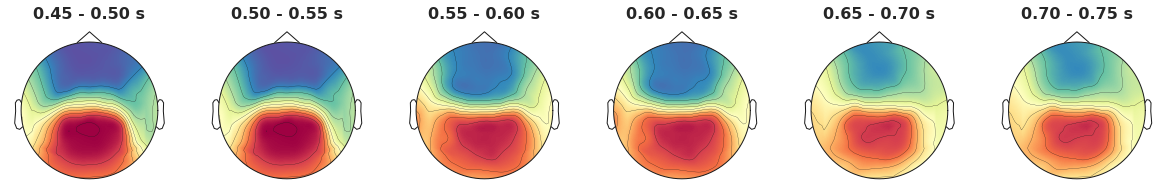

In [42]:
times = [0.475, 0.525, 0.575, 0.625, 
         0.675, 0.725]
#stat annotation
time_format = ['0.45 - 0.50 s', '0.50 - 0.55 s', '0.55 - 0.60 s','0.60 - 0.65 s',\
               '0.65 - 0.70 s', '0.70 - 0.75 s']

figw, figh = 20, 4
fig, ax = plt.subplots(nrows=1, ncols=len(times), figsize=[figw, 4])

cmin =0
cmax = 100

for idx in range(len(times)):
        mean_evoked_alert.plot_topomap(axes = ax[idx],times=times[idx], time_format = time_format[idx],
                                   vmin = cmin, vmax = cmax,colorbar=False,**topo_kwargs)
for idx in range(len(times)):
    for item in ([ax[idx].title, ax[idx].xaxis.label, ax[idx].yaxis.label] +
                 ax[idx].get_xticklabels() + ax[idx].get_yticklabels()):
                 item.set_fontsize(16)
                 item.set_fontweight('heavy')
plt.savefig(fig_dir + "alert_driftrateregression_2.png", bbox_inches = 'tight', pad_inches = 0.1)

In [43]:
time_indexes

array([-0.175, -0.125, -0.075, -0.025,  0.025,  0.075,  0.125,  0.175,
        0.225,  0.275,  0.325,  0.375,  0.425,  0.475,  0.525,  0.575,
        0.625,  0.675,  0.725,  0.775])

In [44]:
# save the array as epoched dataset so it can be used in computing noise covariances later..
n_tpts = len(time_indexes)
n_epochs = len(evokeds_alert)
channels = mean_evoked_alert.ch_names
n_channels = len(channels)
events = np.array([np.arange(n_epochs), np.ones(n_epochs), np.ones(n_epochs)]).T.astype(int)
data = np.empty([n_epochs, n_channels, n_tpts])
for idx in range(n_epochs):
     data[idx,:,:] = evokeds_alert[idx].data
     events[idx][2] = int(awake_fnames[idx])

sfreq = 20  # Sampling frequency
times = mean_evoked_alert.times
info = mne.create_info(channels, sfreq=sfreq, ch_types = "eeg")

epochs = mne.EpochsArray(data, info, events)
epochs.shift_time(-0.175)
epochs.save(outputfolder + 'patterns/' + 'awake_patterns_leftright_epo.fif',overwrite=True)

30 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Overwriting existing file.


In [45]:
# don't worry about the shift of 25 ms as we use only values in the negative range to compute noise covariances..
epochs.times

array([-0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,
        0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,
        0.75,  0.8 ])

# Drowsy condition

In [46]:
epochs_fnames = list()
drowsy_fnames = list()
for s, subject in enumerate(subjects):  # Loop across each subject
    fnamepath = outputfolder + 'patterns/' + subject + '_' + 'drowsy_patterns_driftrateregression_ave.fif'
    if os.path.isfile(fnamepath):
        epochs_fnames.append(fnamepath)
        drowsy_fnames.append(subject)
    else:
        print("Skipping file")
    
evokeds_drowsy = [read_evokeds(f, verbose='error')[0] for f in epochs_fnames]
mean_evoked_drowsy = combine_evoked(evokeds_drowsy, weights="nave")

In [47]:
mean_evoked_drowsy.data = mean_evoked_drowsy.data/(10**6)
mean_evoked_drowsy.times = time_indexes

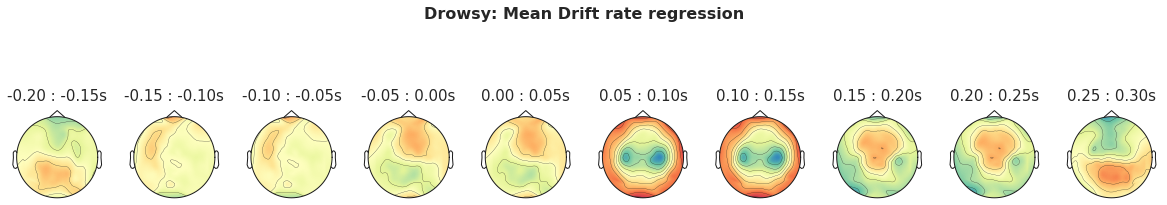

In [48]:
times = [-0.175, -0.125, -0.075, -0.025, 0.025, 
         0.075, 0.125, 0.175, 0.225, 0.275]
#stat annotation
time_format = ['-0.20 : -0.15s', '-0.15 : -0.10s', '-0.10 : -0.05s', '-0.05 : 0.00s','0.00 : 0.05s',\
               '0.05 : 0.10s', '0.10 : 0.15s', '0.15 : 0.20s', '0.20 : 0.25s', '0.25 : 0.30s']

figw, figh = 20, 4
fig, ax = plt.subplots(nrows=1, ncols=len(times), figsize=[figw, 4])

cmin =0
cmax = 100

for idx in range(len(times)):
        mean_evoked_drowsy.plot_topomap(axes = ax[idx],times=times[idx], time_format = time_format[idx],
                                   vmin = cmin, vmax = cmax,colorbar=False,**topo_kwargs)

fig.suptitle('Drowsy: Mean Drift rate regression',fontsize = 16, fontweight = 'heavy')
plt.show()

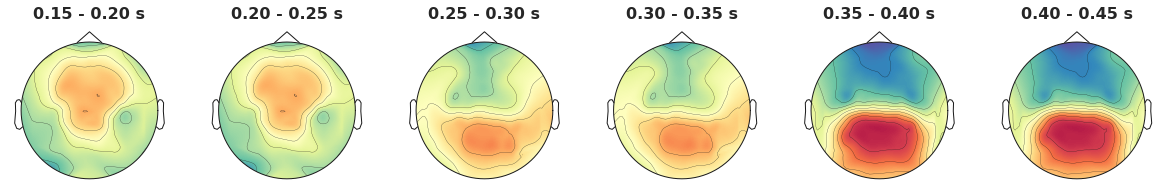

In [49]:
times = [0.175, 0.225, 0.275, 0.325, 0.375, 
         0.425]
#stat annotation
time_format = ['0.15 - 0.20 s', '0.20 - 0.25 s', '0.25 - 0.30 s', '0.30 - 0.35 s','0.35 - 0.40 s',\
               '0.40 - 0.45 s']

figw, figh = 20, 4
fig, ax = plt.subplots(nrows=1, ncols=len(times), figsize=[figw, 4])

cmin =0
cmax = 100

for idx in range(len(times)):
        mean_evoked_drowsy.plot_topomap(axes = ax[idx],times=times[idx], time_format = time_format[idx],
                                   vmin = cmin, vmax = cmax,colorbar=False,**topo_kwargs)

for idx in range(len(times)):
    for item in ([ax[idx].title, ax[idx].xaxis.label, ax[idx].yaxis.label] +
                 ax[idx].get_xticklabels() + ax[idx].get_yticklabels()):
                 item.set_fontsize(16)
                 item.set_fontweight('heavy')
plt.savefig(fig_dir + "drowsy_driftrateregression_1.png", bbox_inches = 'tight', pad_inches = 0.1)

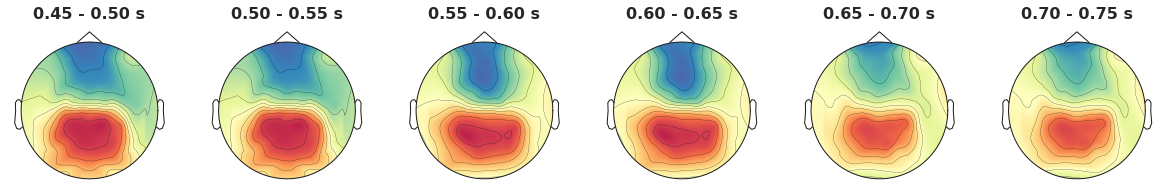

In [50]:
times = [0.475, 0.525, 0.575, 0.625, 
         0.675, 0.725]
#stat annotation
time_format = ['0.45 - 0.50 s', '0.50 - 0.55 s', '0.55 - 0.60 s','0.60 - 0.65 s',\
               '0.65 - 0.70 s', '0.70 - 0.75 s']

figw, figh = 20, 4
fig, ax = plt.subplots(nrows=1, ncols=len(times), figsize=[figw, 4])

cmin =0
cmax = 100

for idx in range(len(times)):
        mean_evoked_drowsy.plot_topomap(axes = ax[idx],times=times[idx], time_format = time_format[idx],
                                   vmin = cmin, vmax = cmax,colorbar=False,**topo_kwargs)

for idx in range(len(times)):
    for item in ([ax[idx].title, ax[idx].xaxis.label, ax[idx].yaxis.label] +
                 ax[idx].get_xticklabels() + ax[idx].get_yticklabels()):
                 item.set_fontsize(16)
                 item.set_fontweight('heavy')
plt.savefig(fig_dir + "drowsy_driftrateregression_2.png", bbox_inches = 'tight', pad_inches = 0.1)

In [51]:
# save the array as epoched dataset so it can be used in computing noise covariances later..
n_tpts = len(time_indexes)
n_epochs = len(evokeds_drowsy)
channels = mean_evoked_drowsy.ch_names
n_channels = len(channels)
events = np.array([np.arange(n_epochs), np.ones(n_epochs), np.ones(n_epochs)]).T.astype(int)
data = np.empty([n_epochs, n_channels, n_tpts])
for idx in range(n_epochs):
     data[idx,:,:] = evokeds_drowsy[idx].data
     events[idx][2] = int(drowsy_fnames[idx])

sfreq = 20  # Sampling frequency
times = mean_evoked_drowsy.times
info = mne.create_info(channels, sfreq=sfreq, ch_types = "eeg")

epochs = mne.EpochsArray(data, info, events)
epochs.shift_time(-0.175)
epochs.save(outputfolder + 'patterns/' + 'drowsy_patterns_leftright_epo.fif',overwrite=True)

30 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped
Overwriting existing file.


In [52]:
# don't worry about the shift of 25 ms as we use only values in the negative range to compute noise covariances..
epochs.times

array([-0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,
        0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,
        0.75,  0.8 ])

## Below sections are for producing difference between regression patterns across conditions..

In [53]:
epochs_fnames1 = list()
epochs_fnames2 = list()
for s, subject in enumerate(subjects):  # Loop across each subject
    fnamepath1 = outputfolder + 'patterns/' + subject + '_' + 'awake_patterns_driftrateregression_ave.fif'
    fnamepath2 = outputfolder + 'patterns/' + subject + '_' + 'drowsy_patterns_driftrateregression_ave.fif'
    if os.path.isfile(fnamepath1) and os.path.isfile(fnamepath2):
        epochs_fnames1.append(fnamepath1)
        epochs_fnames2.append(fnamepath2)
    else:
        print("Skipping file")
    
evokeds_alert = [read_evokeds(f, verbose='error')[0] for f in epochs_fnames1]
evokeds_drowsy = [read_evokeds(f, verbose='error')[0] for f in epochs_fnames2]

In [54]:
evokeds_alert[0].times

array([-0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,
        0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,
        0.75,  0.8 ])

In [55]:
time_indexes

array([-0.175, -0.125, -0.075, -0.025,  0.025,  0.075,  0.125,  0.175,
        0.225,  0.275,  0.325,  0.375,  0.425,  0.475,  0.525,  0.575,
        0.625,  0.675,  0.725,  0.775])

In [56]:
n_tpts = len(mean_evoked_alert.times)
n_epochs = len(evokeds_alert)
channels = evokeds_alert[0].ch_names
n_channels = len(channels)
events = np.array([np.arange(n_epochs), np.ones(n_epochs), np.ones(n_epochs)]).T.astype(int)
cond1_data = np.empty([n_epochs, n_channels, n_tpts])
cond2_data = np.empty([n_epochs, n_channels, n_tpts])
for idx in range(n_epochs):
     cond1_data[idx,:,:] = evokeds_alert[idx].data
     cond2_data[idx,:,:] = evokeds_drowsy[idx].data

In [57]:
cond1_data.shape

(30, 92, 20)

In [58]:
np.max(cond1_data)

99.99999974752427

Could not find a connectivity matrix for the data. Computing connectivity based on Delaunay triangulations.
-- number of connected vertices : 92
<class 'scipy.sparse.csr.csr_matrix'>


Text(0.5, 1.0, 'Between-sensor adjacency')

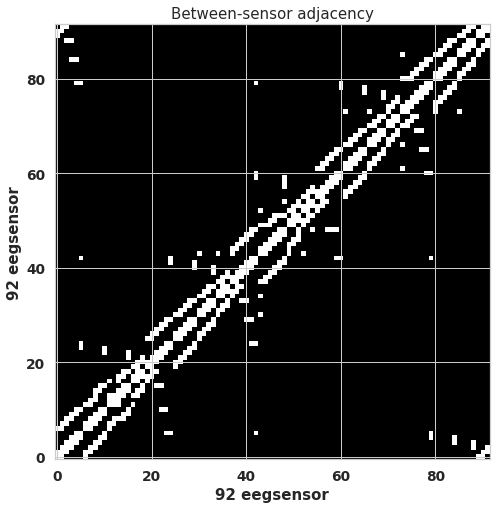

In [59]:
from mne.channels import find_ch_connectivity
eeg_connectivity, ch_names = find_ch_connectivity(evokeds_alert[0].info, ch_type='eeg')
print(type(eeg_connectivity))  # it's a sparse matrix!

plt.imshow(eeg_connectivity.toarray(), cmap='gray', origin='lower',
           interpolation='nearest')
plt.xlabel('{} eegsensor'.format(len(ch_names)))
plt.ylabel('{} eegsensor'.format(len(ch_names)))
plt.title('Between-sensor adjacency')

In [60]:
print('Condition#1 data: ',cond1_data.shape)
print('Condition#2 data: ',cond2_data.shape)

Condition#1 data:  (30, 92, 20)
Condition#2 data:  (30, 92, 20)


In [61]:
cond1_data = np.transpose(cond1_data, (0, 2, 1))# transpose for clustering
cond2_data = np.transpose(cond2_data, (0, 2, 1))# transpose for clustering
print('Condition#1 data: ',cond1_data.shape)
print('Condition#2 data: ',cond2_data.shape)

Condition#1 data:  (30, 20, 92)
Condition#2 data:  (30, 20, 92)


In [62]:
X_data = cond1_data-cond2_data  #cond1_data-cond2_data
X_data.shape

(30, 20, 92)

In [63]:
# two tailed t-value verified with.. https://goodcalculators.com/student-t-value-calculator/ 
# (df = 29, alpha = 0.01) -> t = 2.75

In [64]:
n_subj = len(cond1_data)
p_threshold = 0.01
t_threshold = -stats.distributions.t.ppf(p_threshold/2, n_subj - 1) 
T_obs, clusters, p_values, _ = spatio_temporal_cluster_1samp_test(X_data,
                                                                  tail = 0, n_permutations=2**12,
                                                                  seed = 1234,
                                                                  n_jobs=1, connectivity=eeg_connectivity,
                                                                  threshold=t_threshold)
good_cluster_inds = np.where(p_values < p_threshold)[0]

stat_fun(H1): min=-4.028813 max=4.314351
Running initial clustering
Found 18 clusters
Permuting 4095 times...
[............................................................] 100.00%  |
Computing cluster p-values
Done.


In [65]:
good_cluster_inds

array([ 5, 14])

In [66]:
for ii, cluster_ind in enumerate(good_cluster_inds):
        v_inds = clusters[cluster_ind][1]
        t_inds = clusters[cluster_ind][0]
        print('Cluster#',str(ii+1), 'from: ', round(np.min(np.unique(time_indexes[t_inds])),3), 
              ' to: ', round(np.max(np.unique(time_indexes[t_inds])),3))
#         print('Adjusted time #',str(ii+1), 'from: ', 
#               round(np.min(np.unique(evokeds_alert[0].times[t_inds])),3), 
#               ' to: ', round(np.max(np.unique(evokeds_alert[0].times[t_inds])),3))

Cluster# 1 from:  0.125  to:  0.275
Cluster# 2 from:  0.175  to:  0.325


In [67]:
len(clusters)

18

In [68]:
# get sensor positions via layout
pos = mne.find_layout(evokeds_alert[0].info).pos

In [69]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mne.viz import plot_topomap
from mne.viz import plot_compare_evokeds

In [70]:
# this is to set up the units as arbitary during the evoked plots..
for idx in range(n_epochs):
    for chidx in range(len(evokeds_alert[0].info['ch_names'])):
        evokeds_alert[idx].set_channel_types(mapping = {evokeds_alert[idx].info['ch_names'][chidx]: 'misc'})
        evokeds_drowsy[idx].set_channel_types(mapping = {evokeds_drowsy[idx].info['ch_names'][chidx]: 'misc'})

In [71]:
evokeds_plot = {"Alert":evokeds_alert,"Drowsy":evokeds_drowsy}

In [72]:
colors = {"Alert": 'r', "Drowsy": 'b'}
linestyles = ['-','-']

In [73]:
evokeds_alert[0].times

array([-0.15, -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,
        0.3 ,  0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,
        0.75,  0.8 ])

In [74]:
mask_params = dict(marker='o', markerfacecolor='grey', markeredgecolor='k', linewidth=0, markersize=7)

cluster (0.125 - 0.275 s)
More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"
cluster (0.175 - 0.325 s)
More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"


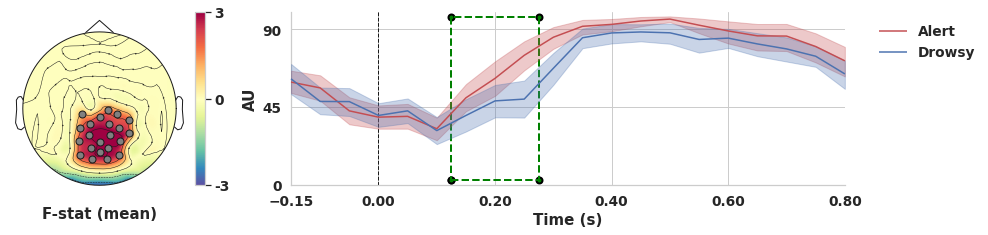

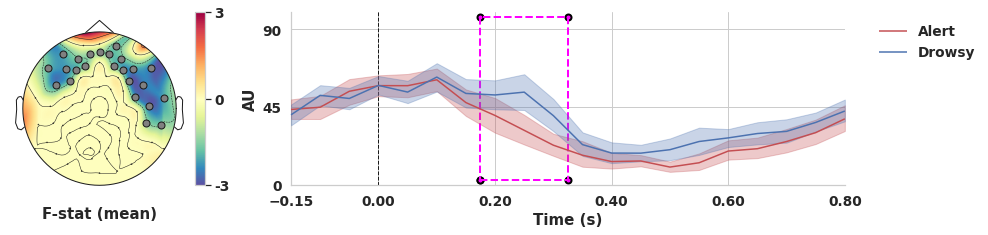

In [75]:
# loop over clusters
for i_clu, clu_idx in enumerate(good_cluster_inds):
    # unpack cluster information, get unique indices
    time_inds, space_inds = np.squeeze(clusters[clu_idx])
    ch_inds = np.unique(space_inds)
    time_inds = np.unique(time_inds)
    
    # get topography for F stat
    f_map = T_obs[time_inds, ...].mean(axis=0)
    
    # get signals at the sensors contributing to the cluster
    sig_times = time_indexes[time_inds]
    
    # create spatial mask
    mask = np.zeros((f_map.shape[0], 1), dtype=bool)
    mask[ch_inds, :] = True
    
    minval = np.min(f_map)
    maxval = np.max(f_map)
    
    f_map = np.squeeze(mask)*f_map


    # initialize figure
    if i_clu == 0:
        fig, ax_topo = plt.subplots(1, 1, figsize=(14, 4.5))
    else:
        fig, ax_topo = plt.subplots(1, 1, figsize=(14, 4))
    

    # plot average test statistic and mark significant sensors
    image, _ = plot_topomap(f_map, pos, mask=mask, axes=ax_topo, cmap=topo_cmap,mask_params = mask_params,
                            vmin=np.min, vmax=np.max, show=False)
    
    # create additional axes (for ERF and colorbar)
    divider = make_axes_locatable(ax_topo)

    # add axes for colorbar
    ax_colorbar = divider.append_axes('right', size='5%', pad=0.05)
    cbar = plt.colorbar(image, cax=ax_colorbar)
    cbar.mappable.set_clim(-3, 3)
    cbar.set_ticks([-3, 0, 3])
    cbar.set_ticklabels([-3, 0, 3])
    ax_topo.set_xlabel('\nF-stat (mean)')
    
    # add new axis for time courses and plot time courses
    ax_signals = divider.append_axes('right', size='300%', pad=1.2)
    
    title = 'cluster ({:0.3f} - {:0.3f} s)'.format(*sig_times[[0, -1]])
    
    print(title)
    
    if sig_times[0] < 0.2:
        title = 'Cluster, {0} sensor'.format(len(ch_inds))
    else:
        title = 'Late Cluster, {0} sensor'.format(len(ch_inds))
    
    if len(ch_inds) > 1:
        title += "s"
    evok_plt = plot_compare_evokeds(evokeds_plot, picks=ch_inds, title = None, axes=ax_signals,legend = True,
                         show=False, colors=colors, linestyles=linestyles, combine = 'mean', 
                         ylim = dict(misc = [0, 100]), split_legend=True, 
                                    truncate_yaxis=False, truncate_xaxis=False,ci = .95)
    
    
    ax_signals.set_title('')
    if i_clu == 0:
        title = ''
        
    ax_signals.legend(bbox_to_anchor=(1.04,1), loc="upper left",facecolor='white', framealpha=0)
    ax_signals.set_yticks([90,45,0])
    ax_signals.set_xticks([-0.15,0,0.2,0.4,0.6,0.8])
    
    # plot temporal cluster extent
    ymin, ymax = ax_signals.get_ylim()
    
    if i_clu == 0 or i_clu == 2:
        highlightcol = 'green'
    else:
        highlightcol = 'magenta'
    
    ax_signals.plot([sig_times[0], sig_times[-1], sig_times[-1],sig_times[0], sig_times[0]], 
                    [ymin+3,         ymin+3,          ymax-3,         ymax-3,       ymin+3], 
                    '--', color = highlightcol, linewidth = 2)
    ax_signals.scatter([sig_times[0], sig_times[-1], sig_times[-1],sig_times[0], sig_times[0]], 
                       [ymin+3,         ymin+3,          ymax-3,         ymax-3,       ymin+3],
                       marker = 'o', edgecolor='black', linewidth=2, color = highlightcol)


    # clean up viz
    mne.viz.tight_layout(fig=fig)
    fig.subplots_adjust(bottom=.05)
    
    fig.savefig(fig_dir + "AlertvsDrowsy_regression_clust_" + str(i_clu+1) + ".png",bbox_inches = 'tight', 
                pad_inches = 0.1)